# Introduction
The goal of this project is to analyze the Electric Vehicle Population Data dataset and predict the Base MSRP of electric vehicles based on their characteristics. The dataset contains information on various electric vehicle models, including their range, battery capacity, and price.

## Problem Statement
The goal of this project is to develop a predictive model that can accurately forecast the Base MSRP of electric vehicles based on their characteristics. This model can be used by EV manufacturers, policymakers, and industry analysts to better understand the factors that influence EV pricing and to make informed decisions.
* Project Type : Supervised Learning - Regression
* Target Variable: Base MSRP

# Data Preprocessing

## Importing necessary libraries

In [121]:
# to deactivate warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Datasets

In [125]:
data = pd.read_csv("C:\\Users\\aniru\\Downloads\\Electric_Vehicle_Population_Data (4).csv")

In [127]:
print("Shape of the dataset is: ")
data.shape

Shape of the dataset is: 


(223995, 17)

In [61]:
print("Columns: ")
data.columns

Columns: 


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [63]:
print("Dataset Information:")
print("\t")
data.info()

Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              

In [65]:
print("Summary Statistics: ")
print("\t")
data.describe()

Summary Statistics: 
	


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [67]:
print("Unique Values: ")
print("\t")
data.nunique()

Unique Values: 
	


VIN (1-10)                                            13175
County                                                  207
City                                                    789
State                                                    48
Postal Code                                             954
Model Year                                               21
Make                                                     46
Model                                                   164
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          109
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       223995
Vehicle Location                                        952
Electric Utility                                         76
2020 Census Tract                       

### Finding missing values

In [129]:
missing_values = data.isnull().sum()
print("Missing Values:")
print("\t")
print(missing_values)

Missing Values:
	
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


### Handling Missing values
* Fill the missing values with mean(For numerical columns)

In [131]:
data['Electric Range'].fillna(data['Electric Range'].mean(), inplace=True)
data['Base MSRP'].fillna(data['Base MSRP'].mean(), inplace=True)
data['Postal Code'].fillna(data['Postal Code'].mean(), inplace=True)
data['2020 Census Tract'].fillna(data['2020 Census Tract'].mean(), inplace=True)

* Fill the missing values with mode(For categorical columns )

In [133]:
data['County'].fillna(data['County'].mode()[0], inplace=True)
data['City'].fillna(data['City'].mode()[0], inplace=True)
data['State'].fillna(data['State'].mode()[0], inplace=True)
data['Vehicle Location'].fillna(data['Vehicle Location'].mode()[0], inplace=True)
data['Electric Utility'].fillna(data['Electric Utility'].mode()[0], inplace=True)
data['Legislative District'].fillna(data['Legislative District'].mode()[0], inplace=True)

In [135]:
# Checking for the null values after imputation
missing_values = data.isnull().sum()
print("Missing Values after Imputation:")
print(missing_values)

Missing Values after Imputation:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


### Checking for duplicates

In [137]:
print("\t")
print(f"Total number of duplicate values is : {data.duplicated().sum()}")

	
Total number of duplicate values is : 0


### EDA and Visuals

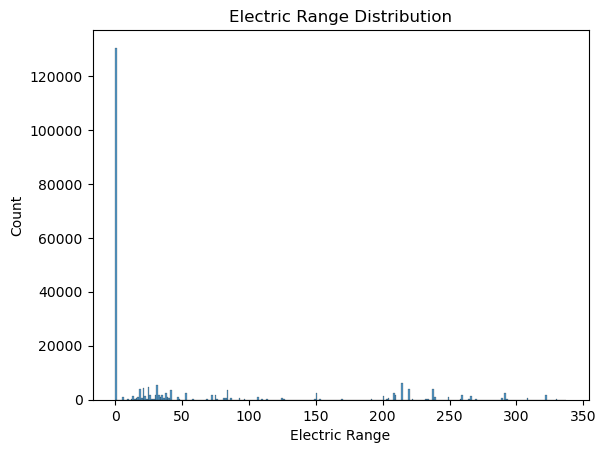

In [79]:
# Electric Range Distribution
sns.histplot(data['Electric Range'])
plt.title('Electric Range Distribution')
plt.show()

#### Histogram of Electric Range Distribution
This histogram shows the distribution of electric range values in the dataset. The distribution appears to be skewed to the right, indicating that most elctric vehicles have a relatively low electric range, while a few have a much higher range.

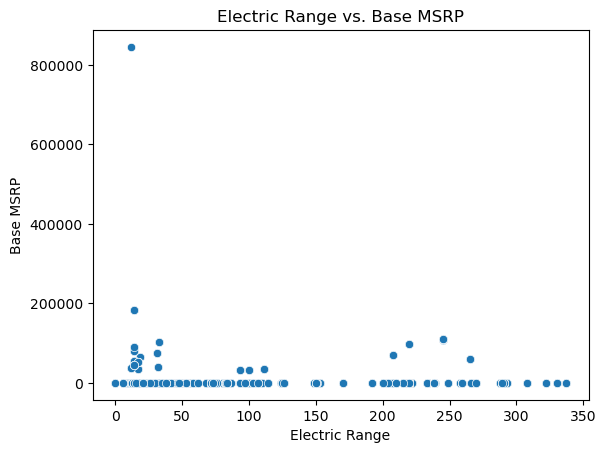

In [81]:
# Electric Range Vs. Base MSRP
sns.scatterplot(x='Electric Range', y='Base MSRP', data=data)
plt.title('Electric Range vs. Base MSRP')
plt.show()

#### Scatterplot of Electric Range vs. Base MSRP
This scatterplot shows the relationship between electric range and Base MSRP in the dataset. The plot suggests a positive correlation between the two variables, indicating that electric vehicles with higher electric ranges tend to have a higher Base MSRP values.

### Finding and Handling outliers
* Find Outliers using the IQR method

In [139]:
data_cleaned = data.copy()

In [141]:
for col in numerical_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    data_cleaned = data_cleaned[~((data_cleaned[col] < (Q1 - 1.5 * IQR)) | (data_cleaned[col] > (Q3 + 1.5 * IQR)))]
    print(f'Outliers removed in {col}')

Outliers removed in Postal Code
Outliers removed in Model Year
Outliers removed in Electric Range
Outliers removed in Base MSRP
Outliers removed in Legislative District
Outliers removed in DOL Vehicle ID
Outliers removed in 2020 Census Tract


In [107]:
# # Find outliers in all numerical columns
# numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# for col in numerical_cols:
#     Q1 = data_cleaned[col].quantile(0.25)
#     Q3 = data_cleaned[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data_cleaned[col][(data_cleaned[col] < (Q1 - 1.5 * IQR)) | (data_cleaned[col] > (Q3 + 1.5 * IQR))]
    
#     print(f'Outliers in {col}: {outliers.shape[0]}')

In [97]:
# # Remove outliers from the data
# for col in numerical_cols:
#     Q1 = data_cleaned[col].quantile(0.25)
#     Q3 = data_cleaned[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     data_cleaned = data_cleaned[(data_cleaned[col] > (Q1 - 1.5 * IQR)) & 
#                                   (data_cleaned[col] < (Q3 + 1.5 * IQR))]

In [109]:
# # Find outliers in all numerical columns
# numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# for col in numerical_cols:
#     Q1 = data_cleaned[col].quantile(0.25)
#     Q3 = data_cleaned[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data_cleaned[col][(data_cleaned[col] < (Q1 - 1.5 * IQR)) | (data_cleaned[col] > (Q3 + 1.5 * IQR))]
    
#     print(f'Outliers in {col}: {outliers.shape[0]}')

In [101]:
# # Calculate Q1, Q3, and IQR
# Q1 = data_cleaned[col].quantile(0.25)
# Q3 = data_cleaned[col].quantile(0.75)
# IQR = Q3 - Q1

# # Adjust the IQR range
# lower_bound = Q1 - 2 * IQR
# upper_bound = Q3 + 2 * IQR

# # Identify outliers
# outliers = data_cleaned[(data_cleaned[col] < lower_bound) | 
#                            (data_cleaned[col] > upper_bound)]

In [103]:
# # Remove outliers
# data_cleaned = data_cleaned[(data_cleaned[col] > lower_bound) & 
#                                (data_cleaned[col] < upper_bound)]

### Check Skewness

In [153]:
# Calculate skewness of numerical columns
numerical_cols = data_cleaned.select_dtypes(include=['int64','float64']).columns
skewness = data_cleaned[numerical_cols].skew()
print(skewness)

Postal Code             1.163221
Model Year             -1.849461
Electric Range          1.924624
Base MSRP               0.000000
Legislative District   -0.553270
DOL Vehicle ID         -1.021972
2020 Census Tract       0.348516
dtype: float64


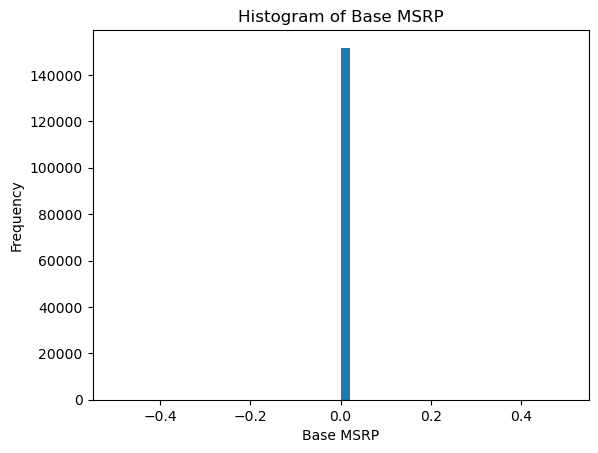

In [155]:
plt.hist(data_cleaned['Base MSRP'], bins=50)
plt.title('Histogram of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()

The skewness values indicate that:
* Most columns are right-skewed (positive values), meaning they have a longer tail on the right side.
* Model Year and Legislative District are left-skewed (negative values).
* Base MSRP has an extremely high skewness value, indicating a highly uneven distribution.


In [1043]:
# data_cleaned['Base MSRP'] = np.sqrt(data_cleaned['Base MSRP'])

In [1155]:
# Remove rows with -inf values
data_cleaned = data_cleaned.replace([-np.inf, np.inf], np.nan)
data_cleaned = data_cleaned.dropna(subset=['Base MSRP'])

In [1139]:
data_cleaned['Base MSRP'] = np.log(data_cleaned['Base MSRP'] + 1)

In [1147]:
data_cleaned['Base MSRP'] = 1 / data_cleaned['Base MSRP']

In [1135]:
from scipy.stats import yeojohnson

data_cleaned['Base MSRP'] = yeojohnson(data_cleaned['Base MSRP'])[0]

In [1157]:
# Calculate skewness of numerical columns
numerical_cols = data_cleaned.select_dtypes(include=['int64','float64']).columns
skewness = data_cleaned[numerical_cols].skew()
print(skewness)

Postal Code             1.753506
Model Year             -1.265636
Electric Range          1.795184
Base MSRP               8.090394
Legislative District   -0.428708
DOL Vehicle ID          0.143008
2020 Census Tract       0.239959
dtype: float64


### Encoding Categorical Data

In [582]:
from sklearn.preprocessing import LabelEncoder

In [592]:
# Converting categorical variables into numerical variables 
categorical_cols = ['VIN (1-10)','County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                     'Vehicle Location', 'Electric Utility']
le = LabelEncoder()
for col in categorical_cols:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])

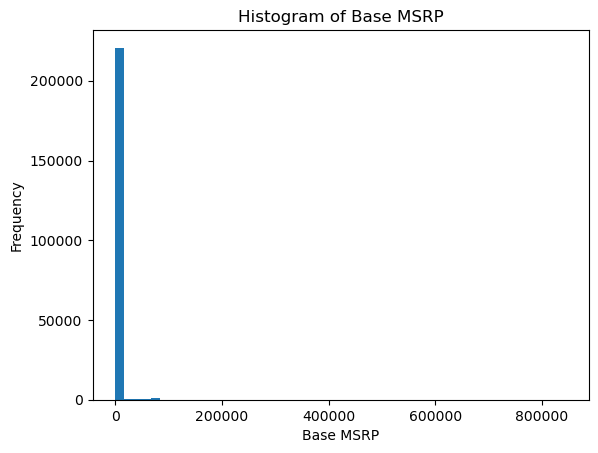

In [248]:
plt.hist(data_cleaned['Base MSRP'], bins=50)
plt.title('Histogram of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()

#### Handling Skewness

In [197]:
# Apply log transformation to the skewed variables
# data_cleaned['Base MSRP'] = np.log(data_cleaned['Base MSRP'])
# data_cleaned['State'] = np.log(data_cleaned['State'])
# data_cleaned['Postal Code'] = np.log(data_cleaned['Postal Code'])
# data_cleaned['2020 Census Tract'] = np.log(data_cleaned['2020 Census Tract'])

In [204]:
# data_cleaned['Base MSRP'] = np.sqrt(data_cleaned['Base MSRP'])
# data_cleaned['State'] = np.sqrt(data_cleaned['State'])
# data_cleaned['Postal Code'] = np.sqrt(data_cleaned['Postal Code'])
# data_cleaned['2020 Census Tract'] = np.sqrt(data_cleaned['2020 Census Tract'])

In [189]:
# data_cleaned['Base MSRP'] = np.sqrt(data_cleaned['Base MSRP'])

In [254]:
#  data_cleaned['Base MSRP'] = np.log1p(data_cleaned['Base MSRP'])
# data_cleaned['State'] = np.log1p(data_cleaned['State'])
# data_cleaned['Postal Code'] = np.log1p(data_cleaned['Postal Code'])
# data_cleaned['2020 Census Tract'] = np.log1p(data_cleaned['2020 Census Tract'])

In [256]:
skewness = data_cleaned.skew()
print("skewness of the dataset:")
print(skewness)

skewness of the dataset:
VIN (1-10)                                            0.546171
County                                                0.413937
City                                                 -0.475762
State                                               -31.771817
Postal Code                                         -39.500051
Model Year                                           -1.265090
Make                                                 -0.740277
Model                                                -0.389295
Electric Vehicle Type                                 1.430447
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0.153140
Electric Range                                        1.795058
Base MSRP                                             8.103256
Legislative District                                 -0.432288
DOL Vehicle ID                                        0.143809
Vehicle Location                                     -0.517788
Electric Utility              

### Feature Selection

In [51]:
# Correlation-based feature selection 
corr_matrix = data_cleaned.corr()

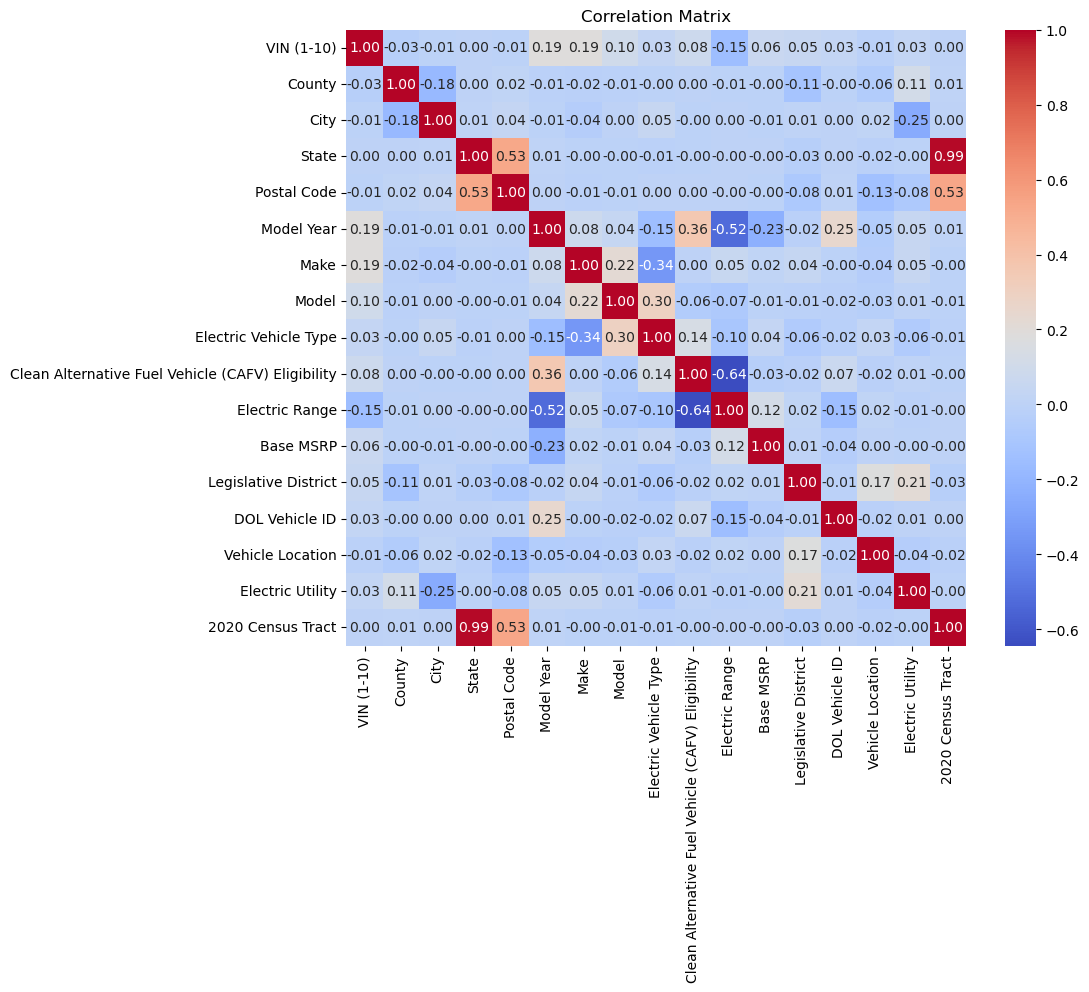

In [53]:
# plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [102]:
# compute correlation of each feature with target
correlation_with_target = data_cleaned.corr()["Base MSRP"].drop("Base MSRP") # drop self-correlation
print("Correlation of Features with Target Variable:")
print(correlation_with_target)

Correlation of Features with Target Variable:
VIN (1-10)                                           0.060488
County                                              -0.002450
City                                                -0.006641
State                                               -0.001023
Postal Code                                         -0.002015
Model Year                                          -0.229246
Make                                                 0.017793
Model                                               -0.005918
Electric Vehicle Type                                0.035987
Clean Alternative Fuel Vehicle (CAFV) Eligibility   -0.032600
Electric Range                                       0.115634
Legislative District                                 0.011199
DOL Vehicle ID                                      -0.044597
Vehicle Location                                     0.002059
Electric Utility                                    -0.001749
2020 Census Tract       

In [110]:
# select features with high correlation to the target
corr_with_target = corr_matrix['Base MSRP'].abs().sort_values(ascending=False)
relevant_features = corr_with_target[corr_with_target > 0.5].index.tolist()

# Retain only relevant features 
data_cleaned_filtered = data_cleaned[relevant_features]

print("Relevant Features based on Correlation")
print(relevant_features)

Relevant Features based on Correlation
['Base MSRP']


### Splitting the Dataset
* Split the data into training and testing sets 

In [96]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling
* Scale the data using StandardScaler

In [105]:
from sklearn.preprocessing import StandardScaler

In [125]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train_cat = pd.get_dummies(X_train[categorical_cols])
X_test_cat = pd.get_dummies(X_test[categorical_cols])

In [127]:
# Scale the numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])